# Titanic: Machine Learning from Disaster
**Predict the survival rates on the Titanic** 
- Defining the problem statement 
- Collecting the data 
- Exploratory data analysis 
- Feature engineering 
- Feature selection 
- Modeling 
- Testing

# 1. Defining the problem statement 
The problem statement is that we are trying to complete the analysis of what type of people were likely to survive the Titanic. In particular, we are asked to apply tools of machine learning to predict the types of passengers that survived the tragedy. 

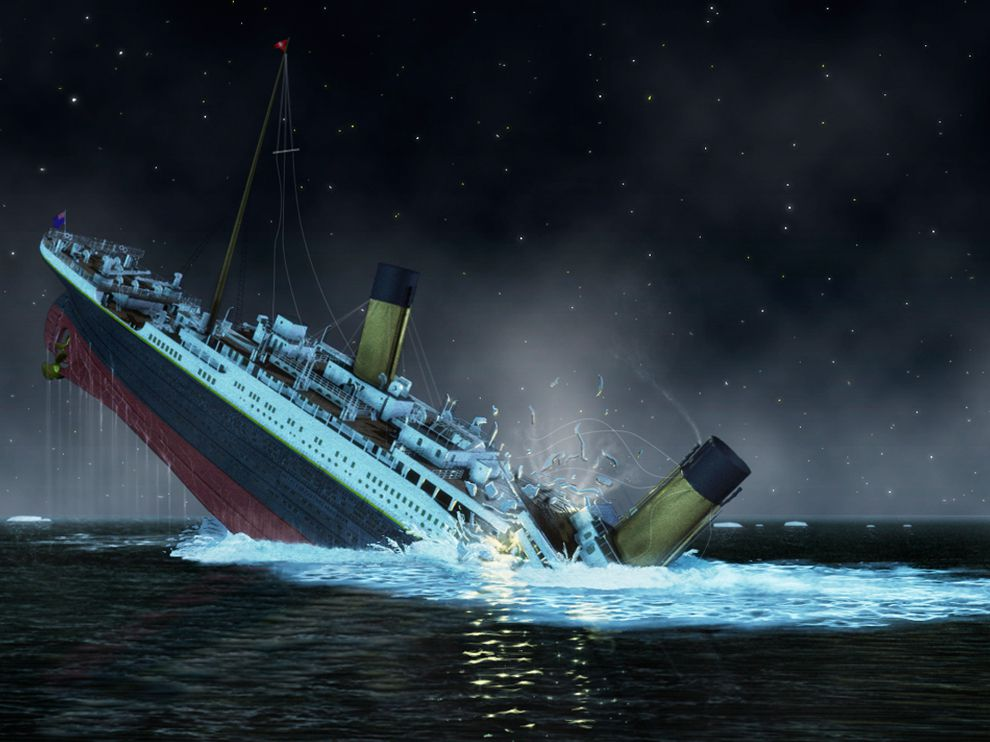

# 2. Collecting the data
Training dataset and testing dataset are given by Kaggle. You can download the datasets from the Kaggle website. 

<b>load train, test dataset using Pandas<b>

In [44]:
import pandas as pd 

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

# 3. Exploratory data analysis 

Let's print the first 5 rows of the train dataset. 

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary
**The data dictionary will describe the features in our dataset that may seem vague** 

- Survived: 0 = No, 1 = Yes
- pclass: Abbreviation for Passenger Class. 1 = First Class, 2 = Second Class, 3 = Third Class 
- SibSp: Abbreviation for Siblings and Spouses. Shows the number of siblings / spouses a passenger had aboard on the Titanic.  
- Parch: Abbreviation for Parents & Children. Shows the number of parents / children a passenger had aboard on the Titanic. 
- Ticket: Ticket number 
- Cabin: Cabin number 
- Embarked: Takes the first letter of the port each passenger was at while aboarding the Titanic. 
    - C = Cherbourg 
    - Q = Queenstown
    - S = Southampton

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset. 

In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**We can notice that there is no feature for 'survived' in our test dataset. Our objective is to create a machine learning model using our test dataset so that we can predict the survival rate of each passenger in our test dataset.**

In [47]:
train.shape

(891, 12)

In [48]:
test.shape

(418, 11)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**There is missing information in for our *Cabin* and *Age* rows. These will be filled in with a certain value using feature engineering.**

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Again, *Age* value is missing for many rows. Out of 418 entries, we only have 332 entries. Similarly, *Cabin* values are also missing. Only 91 out of 418 rows have proper *Cabin* values.** 

We will use the **'isnull().sum'**
method in Pandas to count the number of missing values we have in our features. Notice that we have 177 rows missing in *Age*, 687 rows missing in *Cabin*, and 2 rows missing in *Embarked*. We will apply the same method for our test dataset. 

In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 3.1 Visualization: *matplotlib.pyplot* & *seaborn*

In [53]:
import matplotlib.pyplot as plt 
from matplotlib.patches import Patch
%matplotlib inline 
import seaborn as sns 
sns.set() #setting seaborn default for plots

### Bar Chart for Categorical Features 

- Pclass (Passenger Class) 
- Sex 
- SibSp (# of siblings and spouse)
- ParCh (# of parents and children) 
- Embarked 
- Cabin

In [54]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    ax = df.plot(kind='bar',figsize=(10,5), color = sns.color_palette('husl'), linewidth = 1, edgecolor = 'black')
    for p in ax.patches: 
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()  * 1.005), color = 'black', fontweight = 'bold', fontsize = '8')

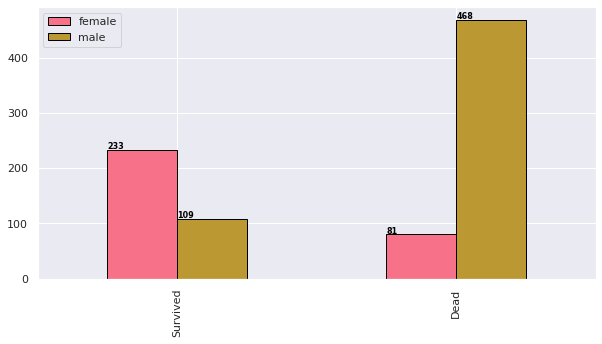

In [55]:
bar_chart('Sex')

- The chart above confirms that **Women** were more likely to survive than **Men**. 

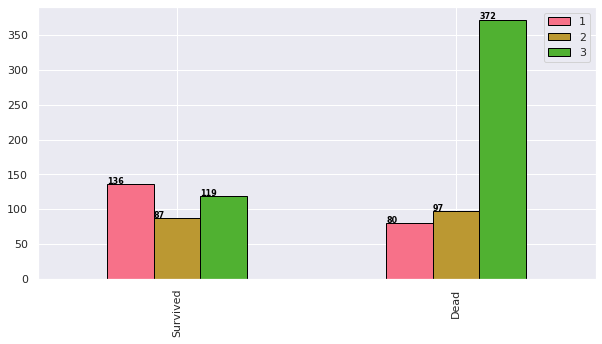

In [56]:
bar_chart('Pclass')

- The chart confirms that passengers who aboarded **1st class** were more likely to survive than any other class. 
- The chart confirms that passengers who aboarded **3rd class** were more likely to die than any other class. 

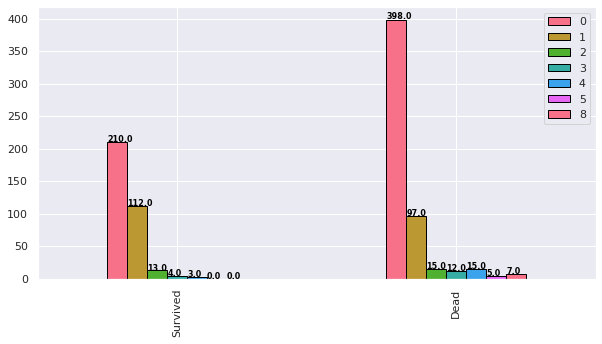

In [57]:
bar_chart('SibSp')

- The chart confirms that passengers **who aboarded without siblings or a spouse** were more likely to die than any other passenger. 

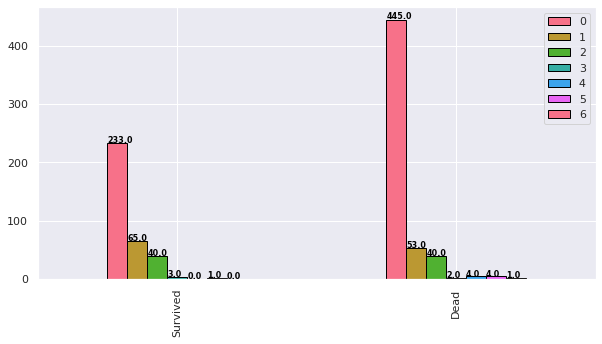

In [58]:
bar_chart('Parch')

- The chart confirms that passengers **who aboarded alone** were more likely to die than any other passenger.

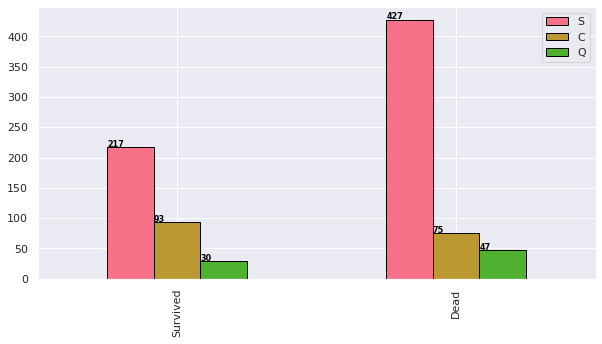

In [59]:
bar_chart('Embarked')

- The chart confirms that a person who aboarded from **Southampton** were more likely to die than any other passenger. 

# 4. Feature Engineering

Feature engineering is the process of using domain knowledge of the data that we are given to create features **(feature vectors)** that make machine learning algorithms work. 

A feature  vector is an n-dimensional vector of numerical features that represent some type of object. Many algorithms in machine learning require a numerical representation of objects, since such representations facilitate processing and statistical analysis. 

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4.1 How did the Titanic actually sink? 

The Titanic sank starting from the back-end of the ship where **Third Class** passengers were located. This is crucial information that we can use as a key feature for our classifier. 

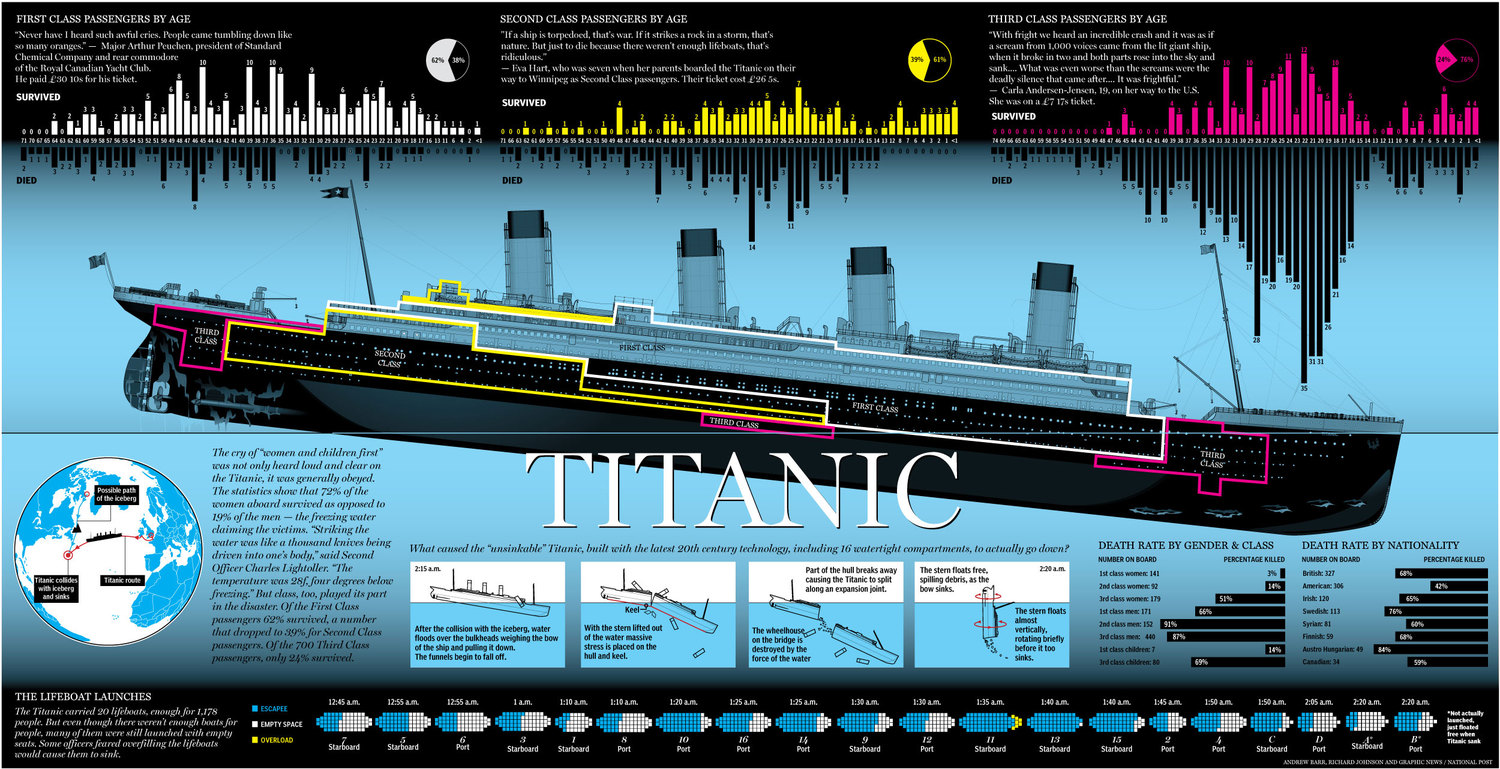

## 4.2 Titles / Honorifics

In [61]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Let's first take a look at names. Although each passenger name does not have significance in our objective of feature engineering, **Titles and Honorifics** may. By extracting titles such as *Mr.* or *Mrs.* from each passenger name, we can hypothesize that these types of information can help us determine the survival rates of passengers. For example, 

- Passengers with the title *Mr.* probably died more than those who had the title *Mrs.* or *Miss.*
- Passengers with the title *Mrs.* most likely aboarded with children, increasing their survival rate. 

In [62]:
# Extract title from passenger names
train_test_data = [train, test] # Combining training and test dataset. We combine both datasets so that in any modification to our datasets, both datasets are affected. 

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [63]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Countess      1
Lady          1
Capt          1
Mme           1
Ms            1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [64]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

We will now have a title map. 

**Title Map** 

- Mr. : 0 
- Miss. : 1 
- Mrs. : 2
- Others : 3 

In [65]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Now we have a new feature column created called **"title"**.

In [67]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


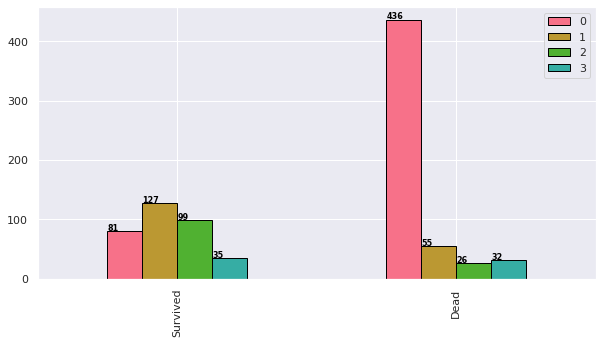

In [68]:
bar_chart('Title')

When we applied our new 'Title' feature to our bar_chart function, we notice that a large amount of passengers with the title **Mr.** died more than any other passenger. Passengers with the titles **Miss.** and **Mrs.** survived more than any other passenger.

We can conclude that we have successfully extracted information using the titles of each passenger. We will now drop the name column since it is no longer needed. 

In [69]:
# delete 'Title' feature from dataset. 
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


## 4.3 Sex

We will also use the mapping method for our Sex feature. 

- Male : 0
- Female: 1 

In [71]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

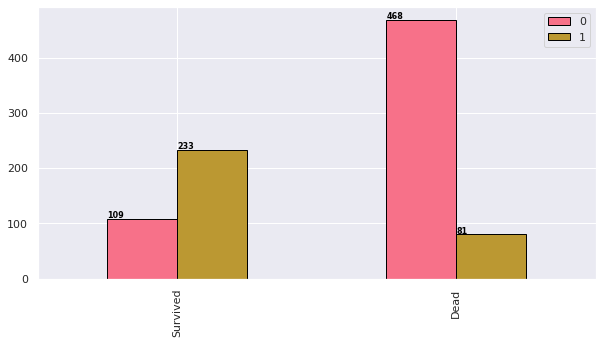

In [72]:
bar_chart('Sex')

**Male** passengers were more likely to die than **female** passengers.

## 4.4 Age

**4.4.1 Some passengers are missing their age!** 

We mentioned earlier than *Age* information is missing for many rows.  

In [73]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


**Solution**: If our age value is NaN, then we will fill those missing values with the median age for each title. For example, if a passenger has the title *Mr.*, then we will add the median age of all passengers with the title *Mr.* to that missing value. 

In [102]:
# fill missing age values with median age value for each title (Mr., Mrs., Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [75]:
train.head(30)
train.groupby('Title')["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

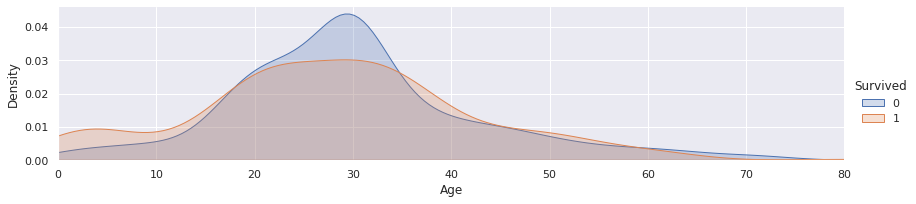

In [76]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

(0.0, 20.0)

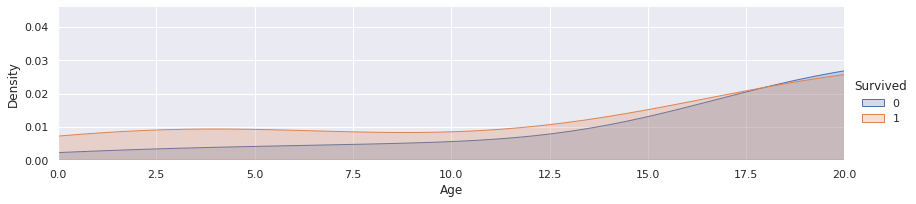

In [77]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

Passengers with the age range between 0 and 20 were more likely to survive.

(20.0, 30.0)

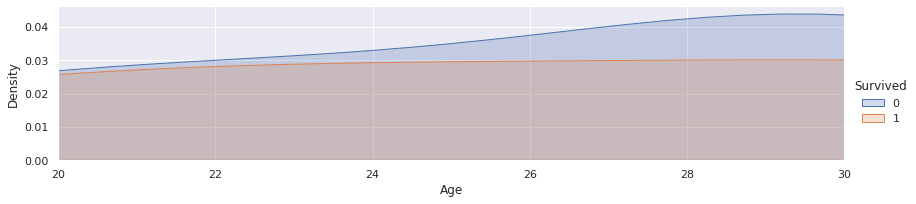

In [78]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

Passengers with the age range of 30 were likely to die the most. 

(30.0, 40.0)

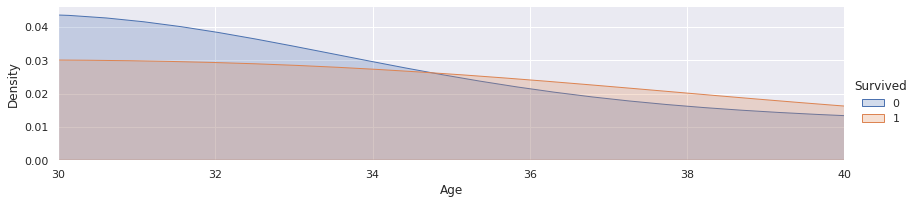

In [79]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

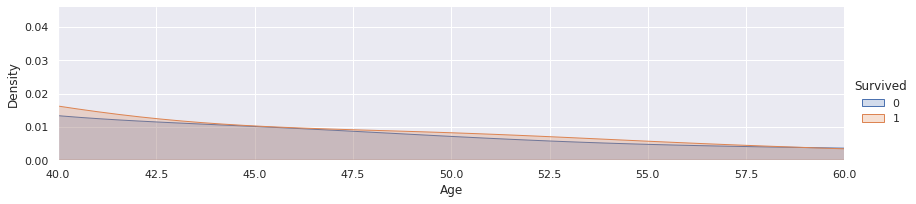

In [80]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60.0, 80.0)

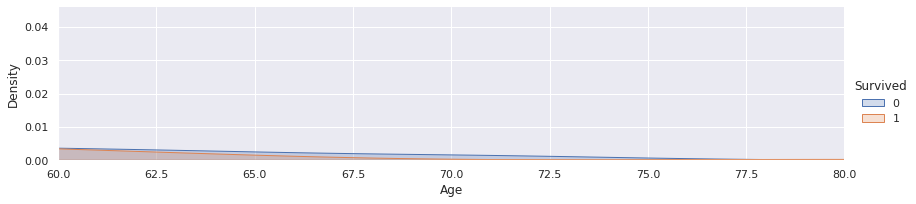

In [81]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60,80)

**4.4.2 Binning** 

Binning is the process of converting continual numerical data into categorical parts. Here, we will bin values for *Age* into the following categories: 

- Children: 0 
- Young adult: 1 
- Adult: 2 
- Mid-Age: 3 
- Senior: 4 

In [85]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [88]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


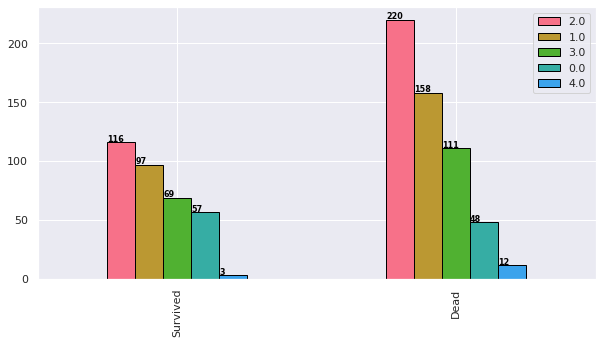

In [87]:
bar_chart('Age')

We can conclude that *Adults* and *Mid-Age* passengers were more likely to die than children. 

## 4.5 Embarked 
**4.5.1 Filling Missing Values**

<AxesSubplot:>

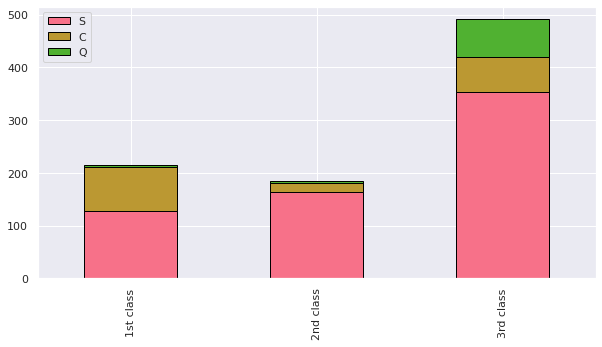

In [96]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',figsize=(10,5), stacked = True, color = sns.color_palette('husl'), linewidth = 1, edgecolor = 'black')

We can conclude the following: 

- More than 50% of 1st class passengers embarked from Southampton. 
- More than 50% of 2nd class passnengers embarked from Southampton. 
- More than 50% of 3rd class passengers embarked from Southampton.

Since most passengers aboarded the Titanic from Southampton, we will fill in missing Embarked values with 'S'. 

In [98]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [101]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2} # Mapping text values of S,C,Q to 0,1,2.
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## 4.6 Fare 

In [103]:
# fill missing Fare value with median fare value for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB
